In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# plt.rcParams['font.size'] = 16
import seaborn as sns
sns.set_theme()
# plt.rcParams['font.family'] = 'Times New Roman'

In [2]:
root_folder = "noise_exp/"
summary_files = list()
score_files = list()
exp_files = os.listdir(root_folder)
for exp_file in exp_files:
    if exp_file.endswith(".csv"):
        if 'summary' in exp_file:
            summary_files.append(exp_file)
        if 'scores' in exp_file and 'old' not in exp_file:
            score_files.append(exp_file)
summary_files = sorted(summary_files)
score_files = sorted(score_files)

In [3]:
# score_files

In [4]:
# pd.read_csv(root_folder + score_files[0])

In [5]:
plot_df = pd.DataFrame()
metric = "Accuracy"
top = 10
for sfile in score_files:
    if 'False' in sfile and '0.0' in sfile:
        tdf = pd.read_csv(root_folder + '/' + sfile)
        for i in range(0,12):
            x = i/20
            if 'Noise' + str(x) in sfile:
                plot_df[str(x)] = tdf[metric]
false_0 = plot_df.head(top)
plot_df = pd.DataFrame()
for sfile in score_files:
    if 'True' in sfile and '0.0' in sfile:
        tdf = pd.read_csv(root_folder + '/' + sfile)
        for i in range(0,12):
            x = i/20
            if 'Noise' + str(x) in sfile:
                plot_df[str(x)] = tdf[metric]
true_0 = plot_df.head(top)

In [6]:
def box_plot(data, edge_color, fill_color, pos_sep=0):
    positions = list(np.array(list(range(1,data.shape[1]+1))) + pos_sep)
    bp = ax.boxplot(data, patch_artist=True, widths=0.2, positions=positions)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color, fill=True)       
        
    return bp

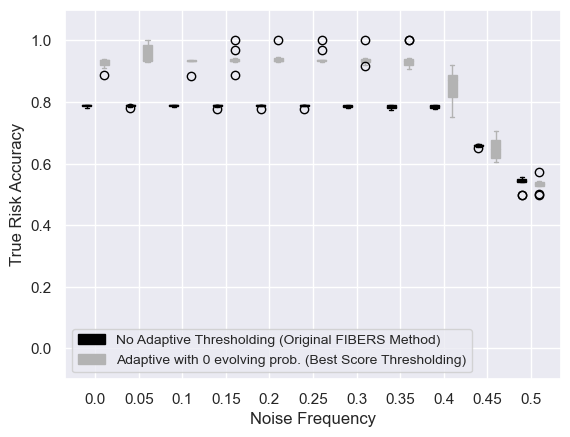

In [7]:
fig, ax = plt.subplots()
seps = np.linspace(-0.2,0.2, 2)
bp1 = box_plot(false_0, plt.cm.gray(1), plt.cm.gray(1), seps[0])
bp2 = box_plot(true_0, plt.cm.gray(0.7), plt.cm.gray(0.7), seps[1])
# bp3 = box_plot(true_1, plt.cm.gray(0.5), plt.cm.gray(0.5), seps[2])
# bp4 = box_plot(true_2, plt.cm.gray(0.3), plt.cm.gray(0.3), seps[3])
ax.legend([bp1["boxes"][0], bp2["boxes"][0]],
          ['No Adaptive Thresholding (Original FIBERS Method)', 'Adaptive with 0 evolving prob. (Best Score Thresholding)'],
          prop={'size': 10})
ax.set_ylim(-0.1, 1.1)
plt.xticks([i+1 for i in range(11)], [i/20 for i in range(11)])
plt.ylabel('True Risk Accuracy')
plt.xlabel('Noise Frequency')
# plt.title('Accuracy of top 10 FIBERS bins with Different Risk Thresholds')
plt.savefig('fig3.png', dpi=600)

In [8]:
plot_df = pd.DataFrame()
metric = "Score"
top = 10
for sfile in score_files:
    if 'False' in sfile and '0.0' in sfile:
        tdf = pd.read_csv(root_folder + '/' + sfile)
        for i in range(0,12):
            x = i/20
            if 'Noise' + str(x) in sfile:
                plot_df[str(x)] = tdf[metric]
false_0 = plot_df.head(top)
plot_df = pd.DataFrame()
for sfile in score_files:
    if 'True' in sfile and '0.0' in sfile:
        tdf = pd.read_csv(root_folder + '/' + sfile)
        for i in range(0,12):
            x = i/20
            if 'Noise' + str(x) in sfile:
                plot_df[str(x)] = tdf[metric]
true_0 = plot_df.head(top)

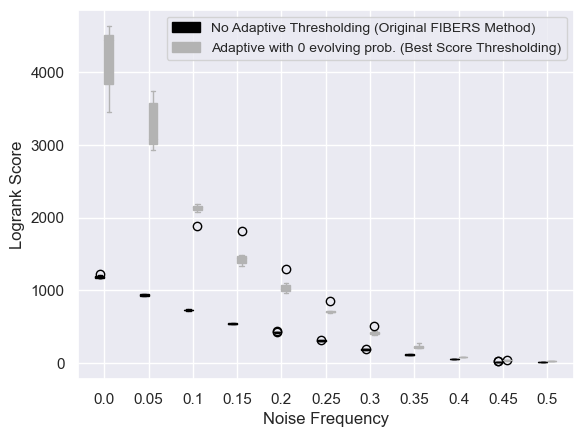

In [9]:
fig, ax = plt.subplots()
seps = np.linspace(-0.1,0.1, 2)
bp1 = box_plot(false_0, plt.cm.gray(1), plt.cm.gray(1), seps[0])
bp2 = box_plot(true_0, plt.cm.gray(0.7), plt.cm.gray(0.7), seps[1])
# bp3 = box_plot(true_1, plt.cm.gray(0.5), plt.cm.gray(0.5), seps[2])
# bp4 = box_plot(true_2, plt.cm.gray(0.3), plt.cm.gray(0.3), seps[3])
ax.legend([bp1["boxes"][0], bp2["boxes"][0]],
        ['No Adaptive Thresholding (Original FIBERS Method)', 'Adaptive with 0 evolving prob. (Best Score Thresholding)'],
        prop={'size': 10})
# ax.set_ylim(-0.1, 1.1)
plt.xticks([i+1 for i in range(11)], [i/20 for i in range(11)])
plt.ylabel('Logrank Score')
plt.xlabel('Noise Frequency')
# plt.title('Accuracy of top 10 FIBERS bins with Different Risk Thresholds')
plt.savefig('fig4.png', dpi=600)